### **"Submission Dicoding Natural Language Processing(NLP) Dengan TensorFlow"**

**Nama : Bayu Prasetyo**

**Domisili : Kota Yogyakarta**

**Kelas Belajar : Belajar Pengembangan Machine Learning (Menengah) By Dicoding**

**Link Profil : https://www.dicoding.com/users/bayupras0301/academies**

**Sumber : Kaggle**

**Link Dataset :  https://www.kaggle.com/kishanyadav/inshort-news**

**Langkah-langkah awal dalam pengembangan model machine learning dimulai dengan memuat data yang akan digunakan. Setelah itu, modul dan pustaka yang diperlukan, seperti TensorFlow/Keras untuk pembuatan model, diimpor. Gaya visualisasi ditetapkan menggunakan seaborn untuk meningkatkan estetika plot.**

**Selanjutnya, dilakukan proses tokenisasi dan padding pada teks menggunakan Tokenizer dan pad_sequences dari TensorFlow/Keras, yang diperlukan untuk mengubah data teks menjadi bentuk yang dapat diproses oleh model machine learning. Model sequential dibangun dengan menambahkan lapisan-lapisan seperti Embedding, LSTM, dan Dense.**

**Data dibagi menjadi set pelatihan dan pengujian menggunakan train_test_split untuk mempersiapkan model. Konfigurasi model dilakukan dengan menentukan fungsi aktivasi, fungsi kerugian, optimizer, dan metrik yang sesuai untuk tujuan tertentu. Selanjutnya, model dilatih pada data pelatihan dan dievaluasi pada data pengujian. Untuk keperluan visualisasi, jika diperlukan, plot dapat dibuat dan ditampilkan menggunakan modul matplotlib.pyplot.**

In [70]:
import pandas as pd
import seaborn as sns
import io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Flatten, Dropout, Dense

sns.set()
%matplotlib inline

**Mengunggah file dari perangkat lokal ke sesi notebook Google Colab untuk digunakan dalam analisis atau pengolahan data di lingkungan Colab.**

In [76]:
from google.colab import files
import warnings
warnings.filterwarnings('ignore')
files = files.upload()

Saving inshort_news_data-1.csv to inshort_news_data-1 (3).csv
Saving inshort_news_data-2.csv to inshort_news_data-2 (3).csv
Saving inshort_news_data-3.csv to inshort_news_data-3 (2).csv
Saving inshort_news_data-4.csv to inshort_news_data-4 (2).csv
Saving inshort_news_data-5.csv to inshort_news_data-5 (2).csv
Saving inshort_news_data-6.csv to inshort_news_data-6 (2).csv
Saving inshort_news_data-7.csv to inshort_news_data-7 (2).csv


**Data dari file CSV yang diunggah akan diubah menjadi DataFrame pandas (news1 hingga news7), sehingga kita dapat melakukan manipulasi dan analisis data lebih lanjut di lingkungan Colab**

In [79]:
news1 = pd.read_csv(io.BytesIO(files['inshort_news_data-1 (3).csv']))
news2 = pd.read_csv(io.BytesIO(files['inshort_news_data-2 (3).csv']))
news3 = pd.read_csv(io.BytesIO(files['inshort_news_data-3 (2).csv']))
news4 = pd.read_csv(io.BytesIO(files['inshort_news_data-4 (2).csv']))
news5 = pd.read_csv(io.BytesIO(files['inshort_news_data-5 (2).csv']))
news6 = pd.read_csv(io.BytesIO(files['inshort_news_data-6 (2).csv']))
news7 = pd.read_csv(io.BytesIO(files['inshort_news_data-7 (2).csv']))

**Dengan menggunakan kode dibawah ini, DataFrame df akan berisi data yang digabungkan dari semua DataFrame dalam list data, dan indeks DataFrame akan diatur ulang menjadi indeks baru yang berurutan.**

In [80]:
data = [news1, news2, news3, news4, news5, news6, news7]
df = pd.concat(data, axis=0, ignore_index=True)
df.head()

,Unnamed: 0,news_headline,news_article,news_category
0,0,50-year-old problem of biology solved by Artif...,DeepMind's AI system 'AlphaFold' has been reco...,technology
1,1,Microsoft Teams to stop working on Internet Ex...,Microsoft Teams will stop working on Internet ...,technology
2,2,Hope US won't erect barriers to cooperation: C...,"China, in response to reports of US adding Chi...",technology
3,3,Global smartphone sales in Q3 falls 5.7% to 36...,The global smartphone sales in the third quart...,technology
4,4,EU hoping Biden will clarify US position on di...,The European Union (EU) is hoping that US Pres...,technology


**Gunakan kode "df.shape" untuk mengetahui dimensi (jumlah baris dan kolom) dari DataFrame df. Secara khusus, df.shape akan mengembalikan tupel yang berisi dua nilai**

In [81]:
df.shape


(12120, 4)

**Selanjutnya, Dengan gunakan kode dibawah ini, kolom 'Unnamed: 0' dan 'news_headline' akan dihapus dari DataFrame, dan DataFrame yang diperbarui akan ditampilkan. Ini dapat berguna jika kolom-kolom tersebut tidak diperlukan dalam analisis atau pemrosesan selanjutnya.**

In [82]:
df = df.drop(['Unnamed: 0', 'news_headline'], axis=1)
df.head()

,news_article,news_category
0,DeepMind's AI system 'AlphaFold' has been reco...,technology
1,Microsoft Teams will stop working on Internet ...,technology
2,"China, in response to reports of US adding Chi...",technology
3,The global smartphone sales in the third quart...,technology
4,The European Union (EU) is hoping that US Pres...,technology


**Penerapan Data Visualization**

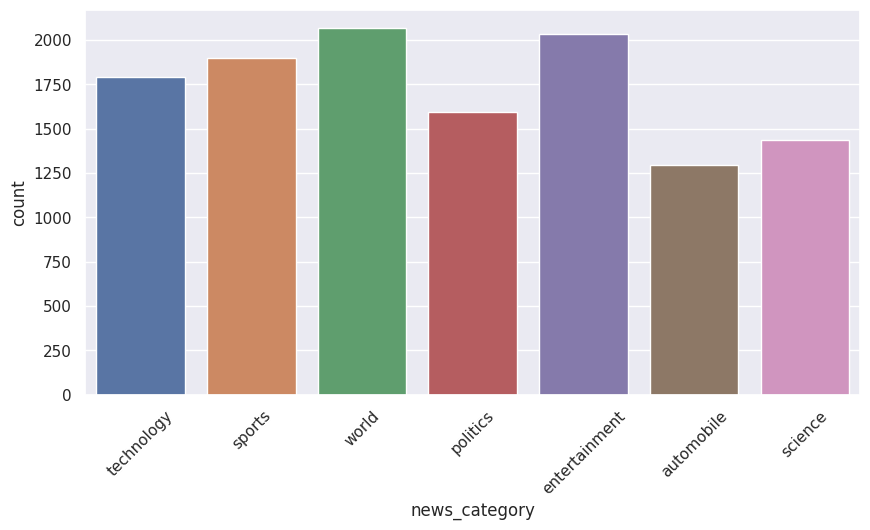

In [85]:
plt.figure(figsize=(10,5))
sns.countplot(x='news_category', data=df)
plt.xticks(rotation=45)
plt.show()


**Dengan menggunakan kode dibawah ini, kita akan membuat representasi one-hot encoding dari kolom kategori dan menggabungkannya dengan DataFrame asli, kemudian menghapus kolom 'news_category' karena informasi tersebut sudah diwakili dalam bentuk one-hot encoding. DataFrame hasilnya adalah DataFrame baru (df2).**

In [86]:
review = pd.get_dummies(df['news_category'])
df2 = pd.concat([df, review], axis=1)
df2 = df2.drop('news_category', axis=1)
df2.head()

,news_article,automobile,entertainment,politics,science,sports,technology,world
0,DeepMind's AI system 'AlphaFold' has been reco...,0,0,0,0,0,1,0
1,Microsoft Teams will stop working on Internet ...,0,0,0,0,0,1,0
2,"China, in response to reports of US adding Chi...",0,0,0,0,0,1,0
3,The global smartphone sales in the third quart...,0,0,0,0,0,1,0
4,The European Union (EU) is hoping that US Pres...,0,0,0,0,0,1,0


**Penggunaan Splitting, Validation Set 20%, Tokenizing, dan Padding**

In [87]:
X = df2['news_article'].values
y = df2.drop('news_article', axis=1).values
#split jadi train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
tokenizer = Tokenizer(num_words=5000, oov_token='n')
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)
sequence_train = tokenizer.texts_to_sequences(X_train)
sequence_test = tokenizer.texts_to_sequences(X_test)
padded_train = pad_sequences(sequence_train)
padded_test = pad_sequences(sequence_test)

**Penggunaan LSTM, Sequential, Embedding Dan Pelatihan Model**

In [88]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.90):
      print('\nakurasi telah mencapai 90%')
      self.model.stop_training = True

callbacks = myCallback()
model = Sequential([
                    Embedding(input_dim=10000, output_dim=128),
                    LSTM(128),
                    Flatten(),
                    Dropout(0.5),
                    Dense(128, activation='relu'),
                    Dense(64, activation='relu'),
                    Dense(7, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(padded_train, y_train, epochs=62, validation_data=(padded_test, y_test), callbacks=[callbacks], batch_size=184)


Epoch 1/62
53/53 [==============================] - 26s 438ms/step - loss: 1.7395 - accuracy: 0.2709 - val_loss: 1.4160 - val_accuracy: 0.3705
Epoch 2/62
53/53 [==============================] - 23s 426ms/step - loss: 0.9774 - accuracy: 0.5994 - val_loss: 0.6544 - val_accuracy: 0.7574
Epoch 3/62
53/53 [==============================] - 24s 464ms/step - loss: 0.4699 - accuracy: 0.8460 - val_loss: 0.4295 - val_accuracy: 0.8639
Epoch 4/62
53/53 [==============================] - ETA: 0s - loss: 0.2671 - accuracy: 0.9201
akurasi telah mencapai 90%
53/53 [==============================] - 25s 466ms/step - loss: 0.2671 - accuracy: 0.9201 - val_loss: 0.3454 - val_accuracy: 0.9002


**Implementasi Hasil Model Accuracy**

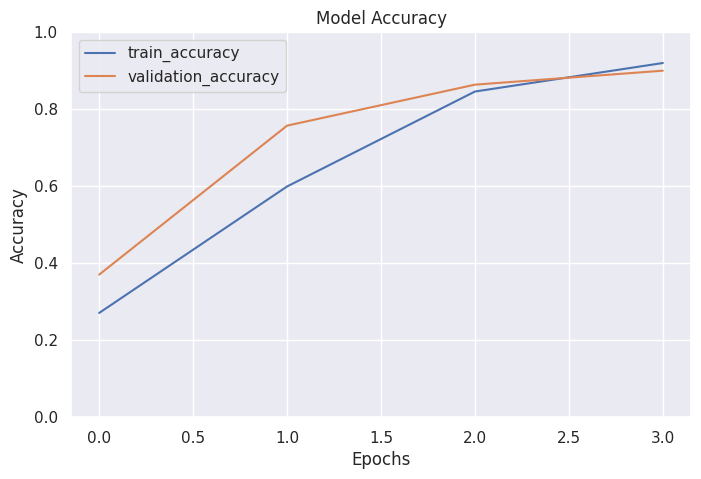

In [89]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(ymin=0, ymax=1)
plt.show()

**Implementasi Hasil Model Loss**

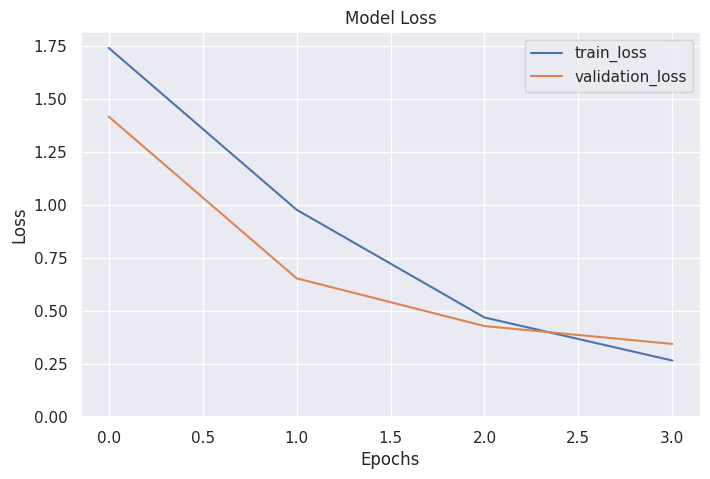

In [90]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim(ymin=0)
plt.show()